**Part 1:** Building A Decision Tree Calssifier

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [47]:
#Read the data
data= pd.read_csv("iris.csv")
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
#Have more informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
#Describe the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
#Check the presence of missing values, count the NaN values with data.isna()
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [51]:
#Group data by species
data.groupby(by="Species").count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

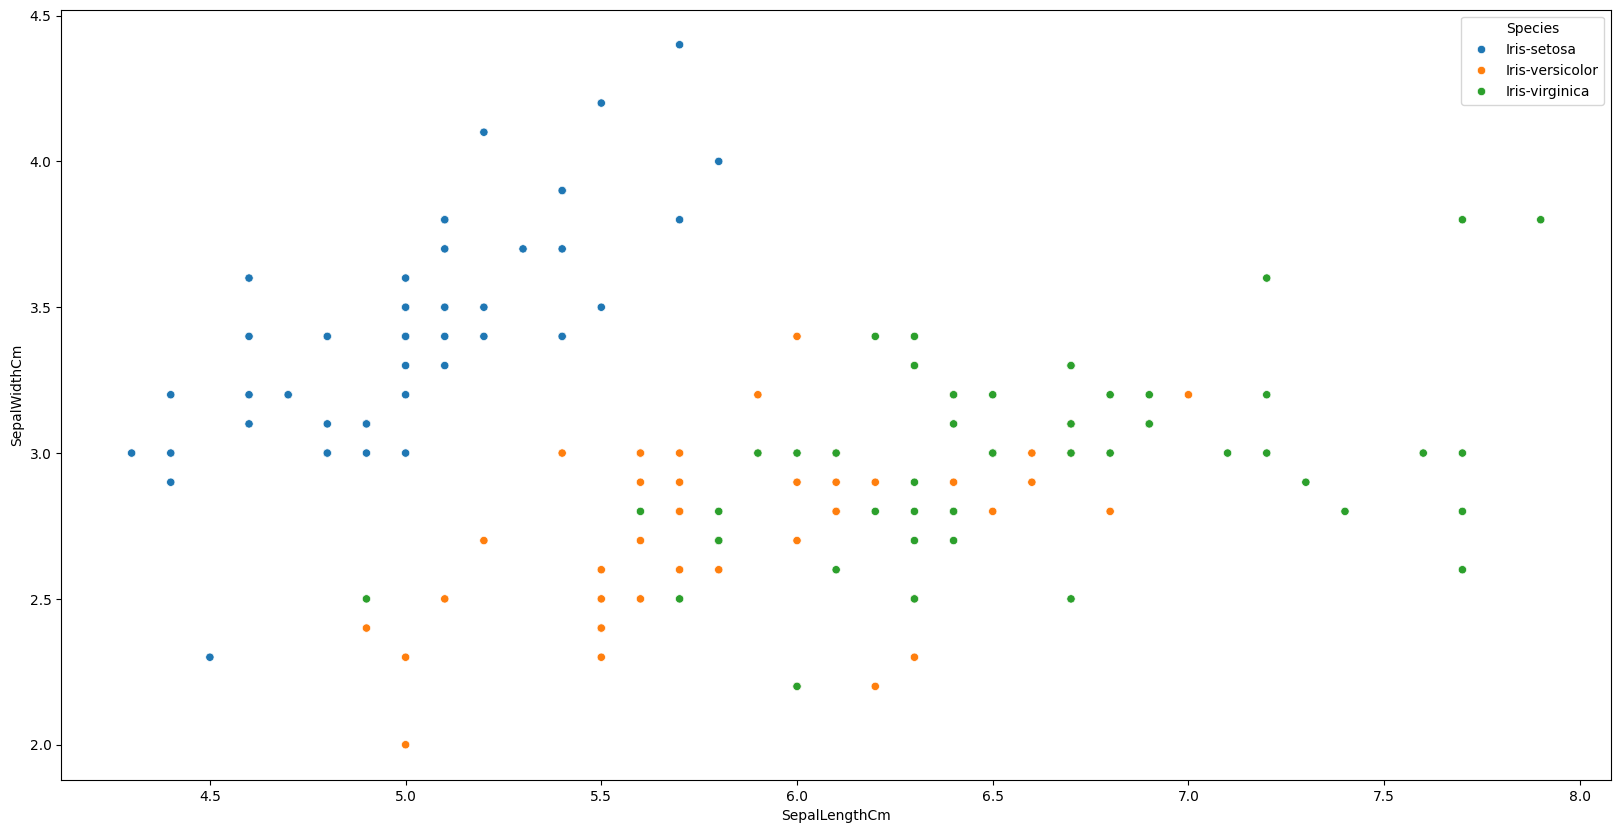

In [52]:
#Visualize with scatter plot
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data)

C:\Users\asus\AppData\Local\Temp\ipykernel_13124\1185776290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.Species == "Iris-setosa"].PetalLengthCm)
C:\Users\asus\AppData\Local\Temp\ipykernel_13124\1185776290.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.Species == 

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

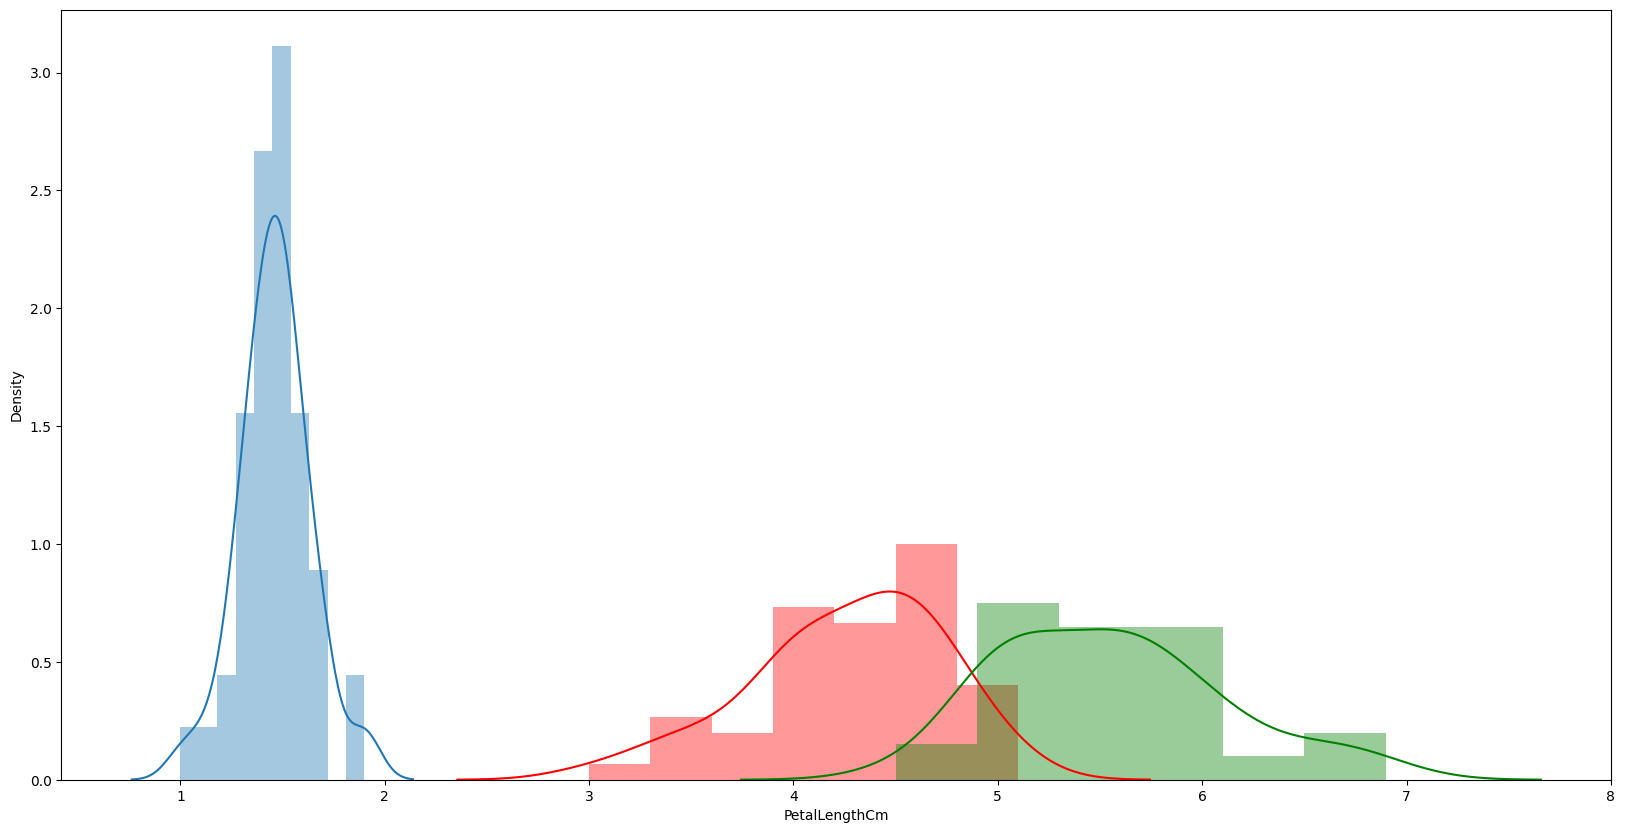

In [53]:
#Visualize with distplot
sns.distplot(data[data.Species == "Iris-setosa"].PetalLengthCm)
sns.distplot(data[data.Species == "Iris-versicolor"].PetalLengthCm,color="r")
sns.distplot(data[data.Species == "Iris-virginica"].PetalLengthCm,color="g")

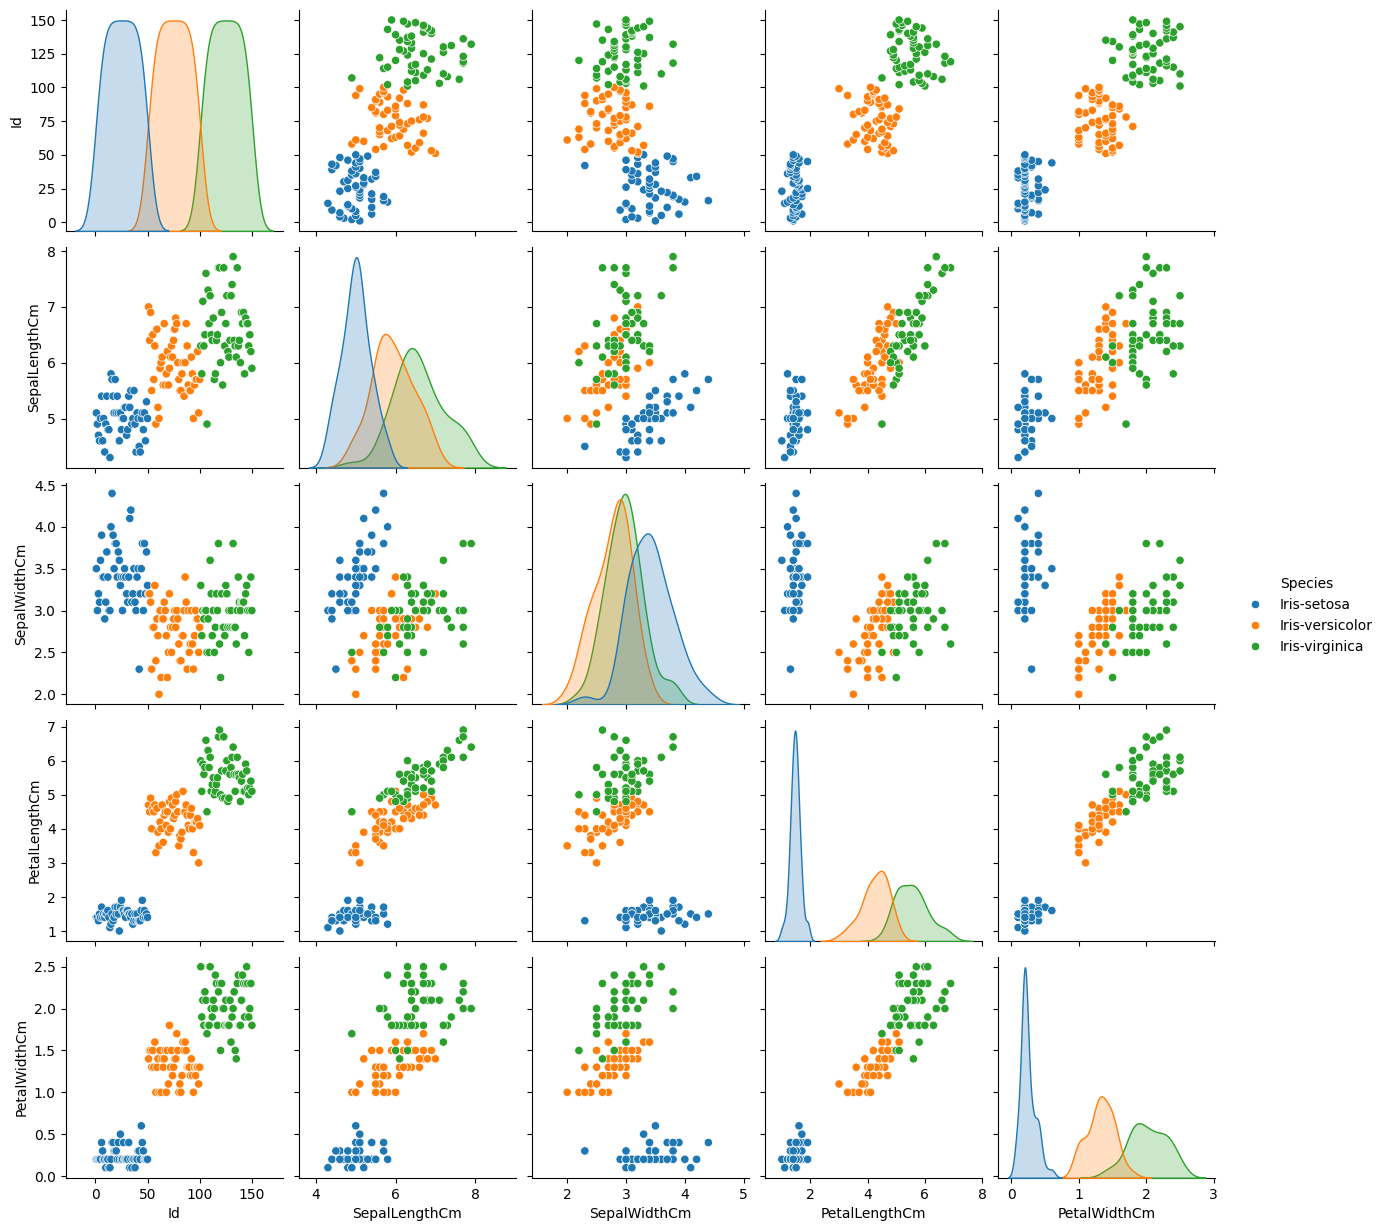

In [54]:
#Visualize with pairplot
# sns.pairplot(data, hue="Species")

In [55]:
#preprocess the data with LabelEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import here the LabelEncoder library from sklearn.preprocessing
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Species"])
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [56]:
data["Label"].value_counts()

Label
0    50
1    50
2    50
Name: count, dtype: int64

In [57]:
#decodage des labels
categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [58]:
classes = list(set(data['Species']))
data.drop(["Id","Species"], axis=1, inplace=True)

In [59]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:

X, y = data.iloc[: , :-1], data.iloc[: , -1]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [62]:
#Import the DecisionTreeClassifier here
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4 , random_state=42)
clf.fit(X_train,y_train)

print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

#From the results, calculate the training and testing Bias and also the variance




Accuracy of train: 0.9714285714285714
Accuracy of test: 1.0


In [63]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [64]:
#Print the results in another format
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


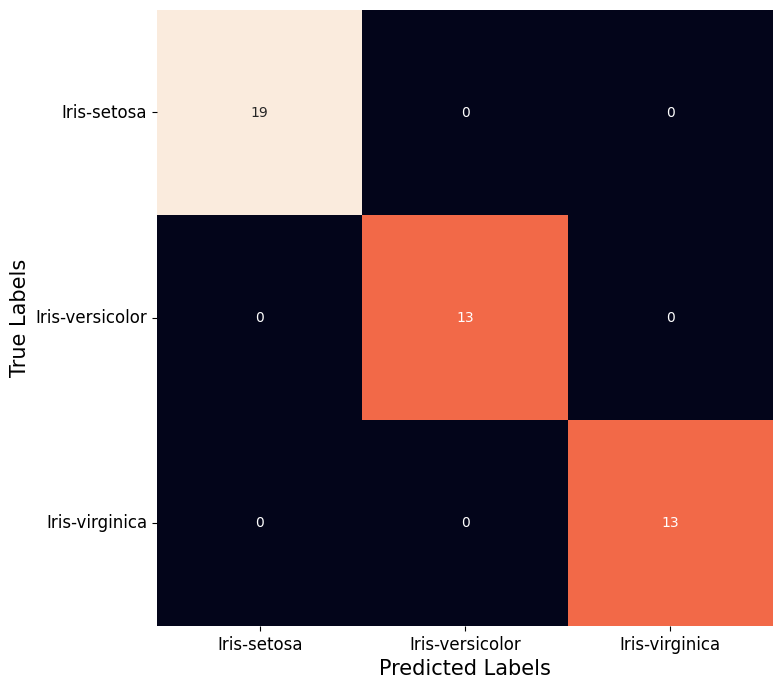

In [72]:
#import here the confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

**Part 2:** Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

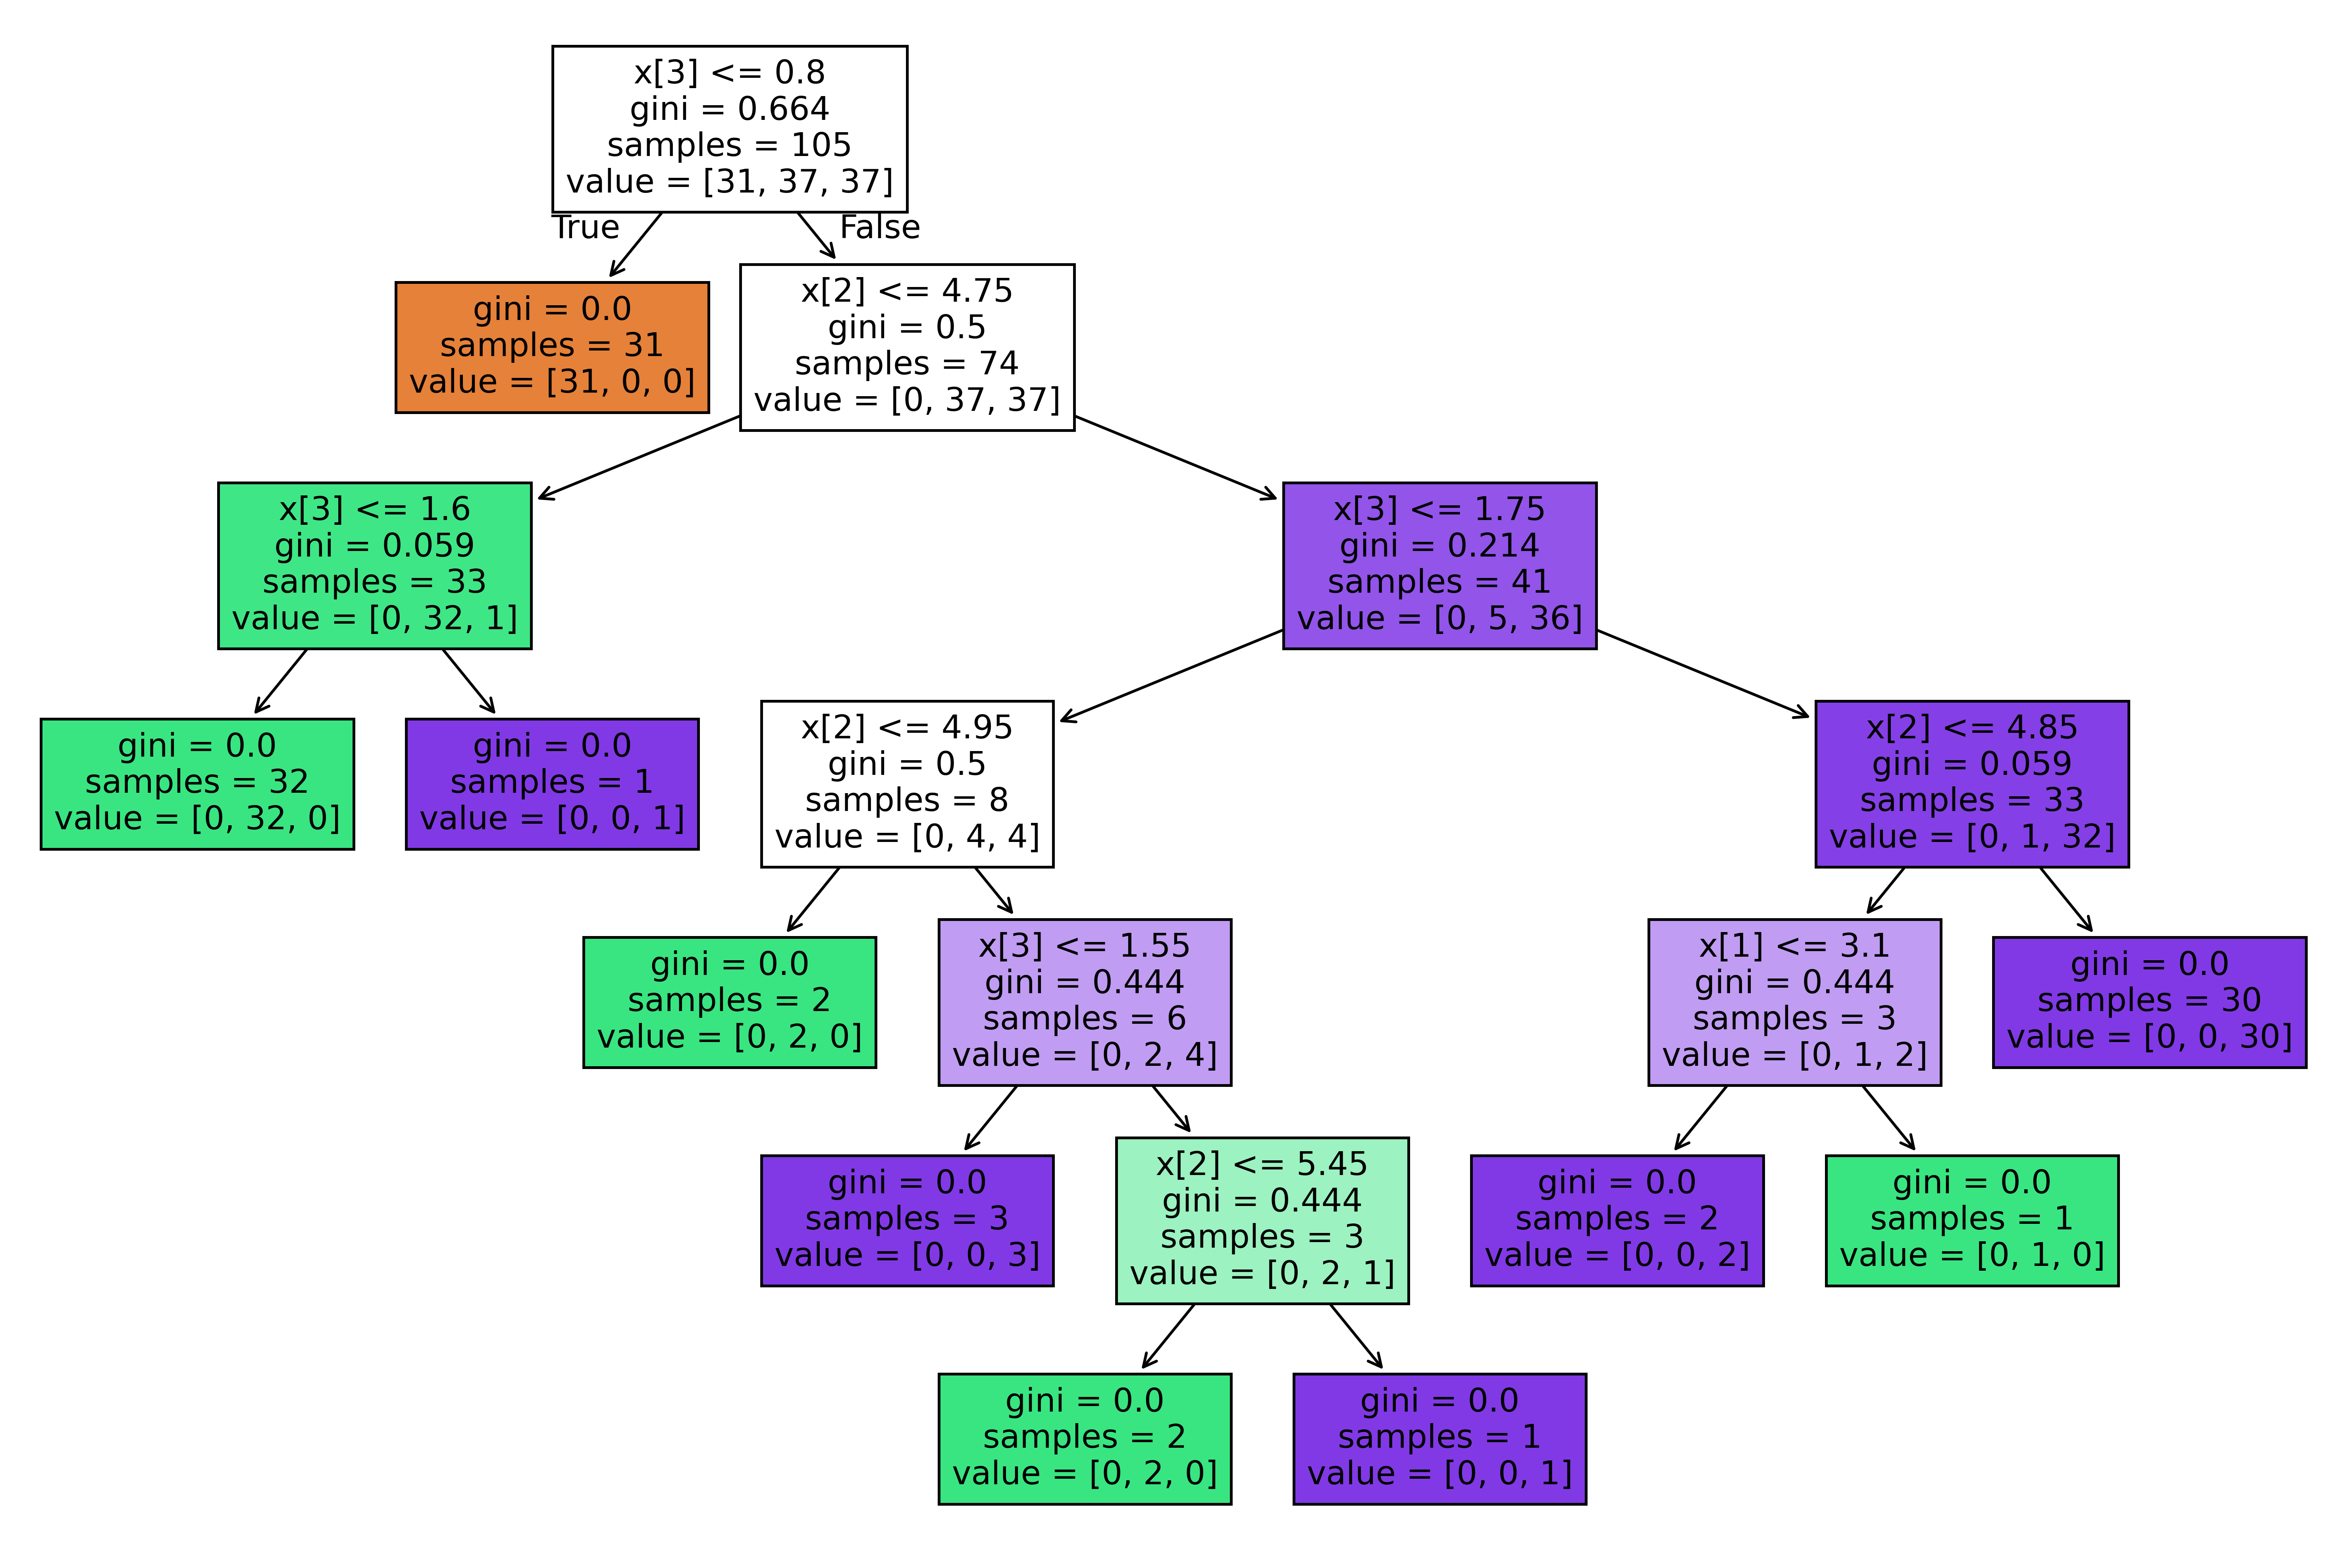

In [80]:
model_gini = tree.DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(X_train,y_train)
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [95]:
#Predicting on test data
preds = model_gini.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts()# getting the count of each category


0    19
1    13
2    13
Name: count, dtype: int64

In [82]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Label,,,
0,19,0,0
1,0,13,0
2,0,0,13


In [83]:
# Accuracy
np.mean(preds==y_test)


np.float64(1.0)

In [84]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [85]:
path = model_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [86]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3121088435374149


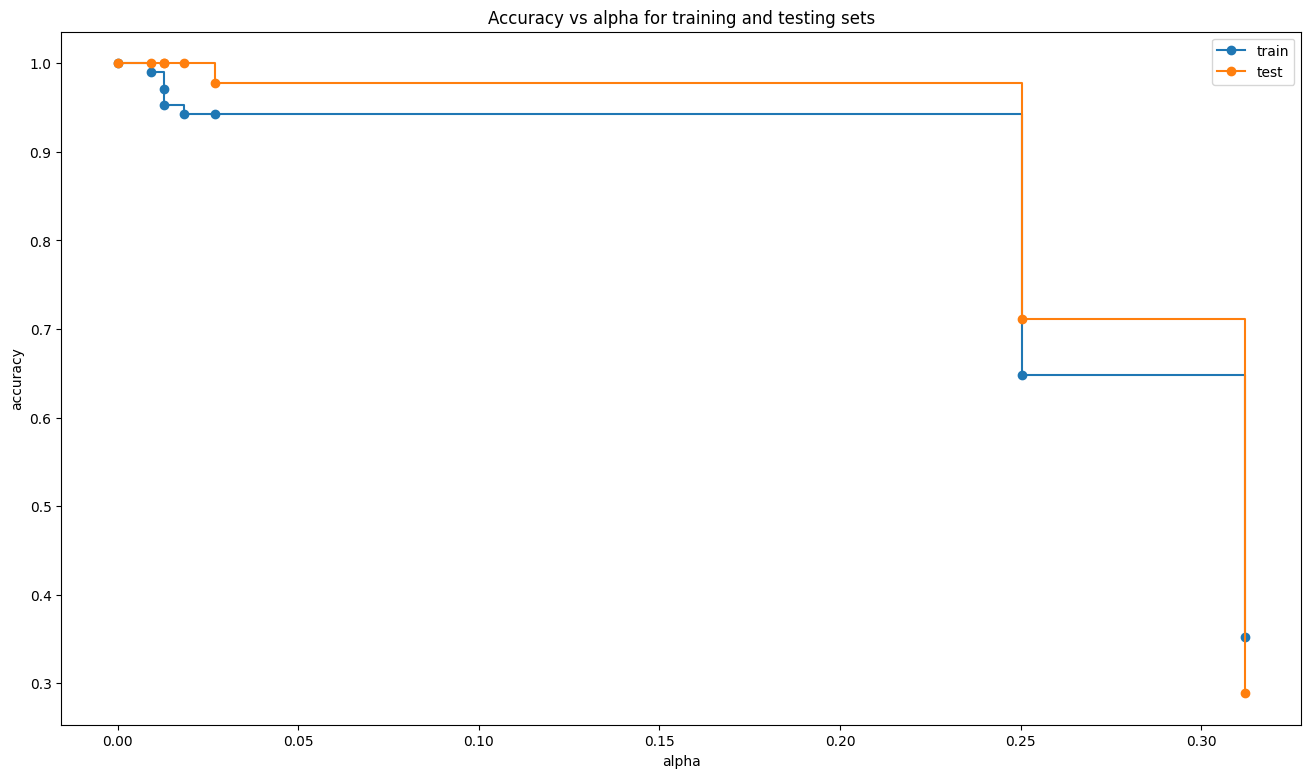

In [87]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [88]:
ccp_alphas

array([0.        , 0.00923521, 0.01269841, 0.01269841, 0.01847042,
       0.02705804, 0.25028684, 0.31210884])

In [89]:
#Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other
clf = tree.DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.02518644)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02518644, random_state=0)

In [90]:
pred_test=clf.predict(X_test)
pred_train=clf.predict(X_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.9428571428571428 
Testing Accuracy 1.0


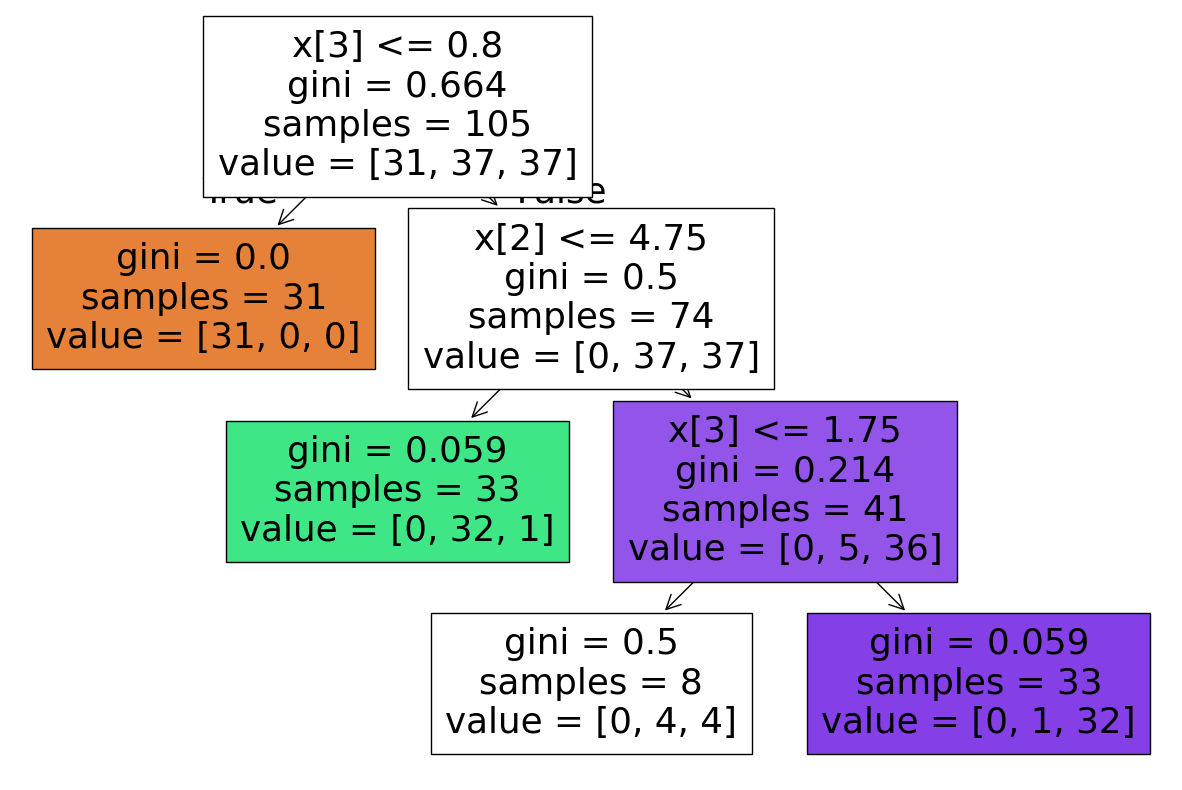

In [100]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Part 3: XGBoost
 Here we will implement XGBoost model, which is an implementation of gradient boosted decision trees designed for speed and performance.



In [103]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [104]:
import xgboost as xgb
#defining the training and testing sets for the new XGBoost model
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [105]:
param = {'max_depth':3,
         'eta':1,
         'objective':'multi:softprob',
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [106]:
#Make some predictions
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.00579347, 0.98294824, 0.01125828],
       [0.9723307 , 0.02345794, 0.00421136],
       [0.00690795, 0.01160963, 0.98148245],
       [0.00566333, 0.9608674 , 0.03346921],
       [0.00564668, 0.9580431 , 0.03631026],
       [0.98156345, 0.01418519, 0.00425135],
       [0.00383292, 0.99213046, 0.00403661],
       [0.01766782, 0.12710157, 0.85523057],
       [0.00865893, 0.8907591 , 0.10058198],
       [0.00383292, 0.99213046, 0.00403661]], dtype=float32)

In [107]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [108]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


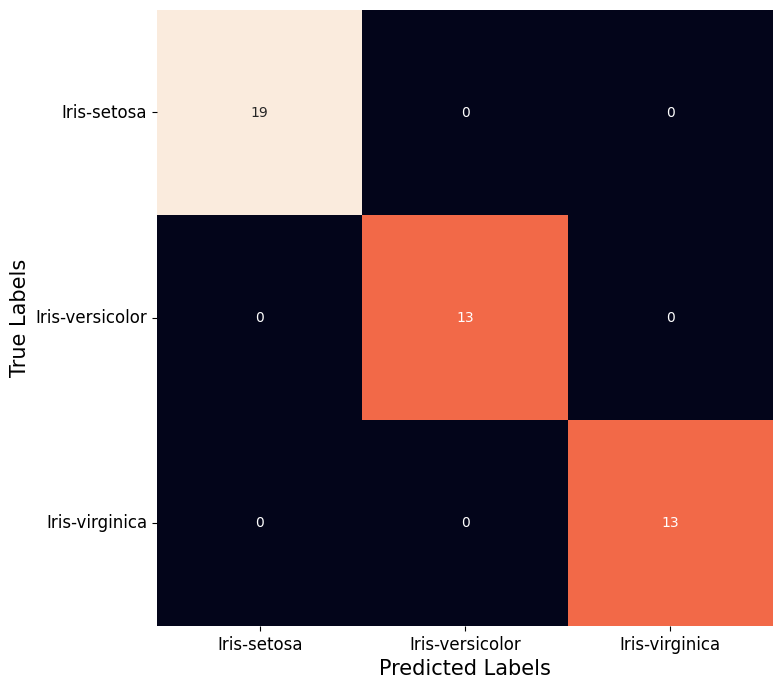

In [109]:
#importing the confusion matrix for the new model
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [110]:
## Hyperparameter Tuning to have better performances

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1,1],
    'n_estimators': [200,500,1000]

}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=2,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_))
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned: {'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Mean of the cv scores is 0.905116
Train Score 0.961905
Test Score 1.000000
Seconds used for refitting the best model on the train dataset: 0.682608


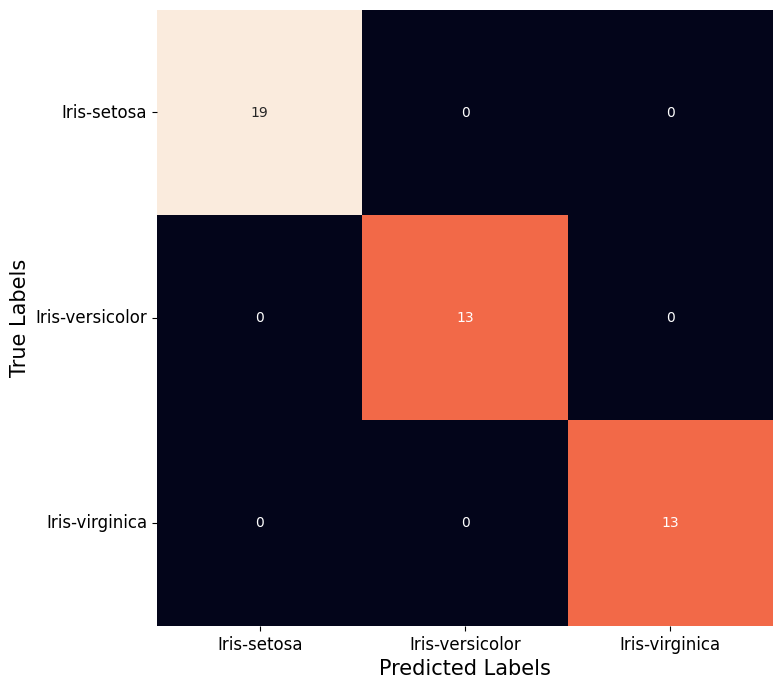

In [111]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()